In [104]:
from scipy.optimize import linprog
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt


- Run your code (or tool) on the example LP problem instance from lecture slides on Simplex (LECTURE-5-and more-2018) (n=4, m=2)
- We will next try to increase the number of variables (n) and increase the number of constraints (m), thus
- Fixing m=2:
•	Rerun the code for the following values of n = [4, 10, 20, 30, 40, 50]. (in increments of 10) AND
- For each of the n values above:
•	Rerun the code for the following values of m = [2, 6, 10, 14] (in increments of 4, just manually/randomly create additional constraints)
- In total, you will test 6 * 4 = 24 total combinations.


m = 4, n = 2

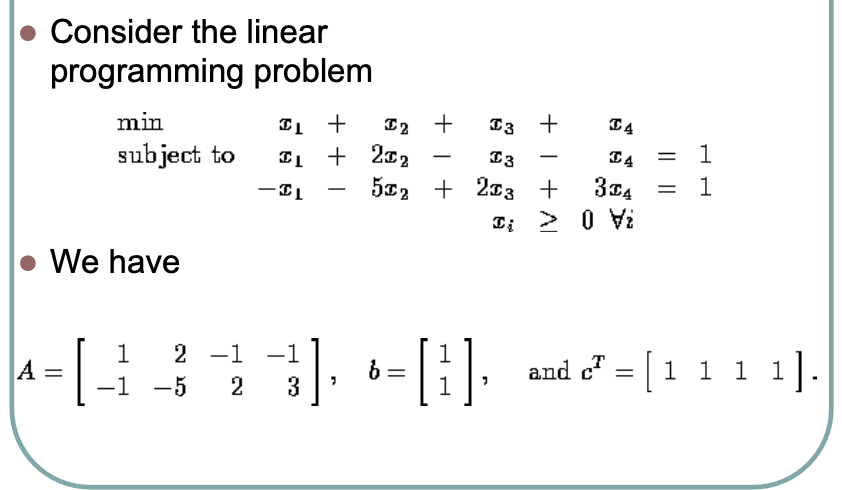


In [105]:
c = [1, 1, 1, 1]
#minimum objective function

In [106]:
#constraints
A_eq = [[1, 2, -1, -1], 
     [-1, -5, 2, 3]]


In [107]:
b_eq = [1, 1]

I dont want my answer to be 0 so this constraint for A_eq and B_eq wont allow me to get 0. since 0 is a min if i leave it as a option

In [120]:
bounds = [(0, None)] * 4  

start_time = time.time()

result = linprog(c, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method='highs')

end_time = time.time()
time_taken = end_time - start_time

print(f"Optimal Value (zmin): {result.fun}")
print(f"Optimal Solution (x): {result.x}")
print(f"Message: {result.message}")
print(f"Number of iterations: {result.nit}")
print(f"Time taken: {time_taken:.4f} seconds")


ValueError: Invalid input for linprog: unable to interpret bounds with this dimension tuple: (4, 2).

In [121]:
results = []


def hardcoded_constraints_n(n):
    if n == 4:
        A_eq = [[1, 2, -1, -1],
                [-1, -5, 2, 3]]
        b_eq = [1, 1]
    elif n == 10:
        A_eq = [[1, 2, -1, -1, 1, -2, 3, -1, 2, 1],  
                [-1, -5, 2, 3, 2, 1, -1, 3, -2, 2]]
        b_eq = [1, 1]
    elif n == 20:
        A_eq = [[1, 2, -1, -1, 1, -2, 3, -1, 2, 1, -1, -5, 2, 3, 2, 1, -1, 3, -2, 2],  
                [-1, -5, 2, 3, 2, 1, -1, 3, -2, 2, 1, 2, -1, -1, 1, -2, 3, -1, 2, 1]]
        b_eq = [1, 1]
    elif n == 30:
        A_eq = [[1, 2, -1, -1, 1, -2, 3, -1, 2, 1, 1, 2, -1, -1, 1, -2, 3, -1, 2, 1, -1, -5, 2, 3, 2, 1, -1, 3, -2, 2],  
                [-1, -5, 2, 3, 2, 1, -1, 3, -2, 2, -1, -5, 2, 3, 2, 1, -1, 3, -2, 2, 1, 2, -1, -1, 1, -2, 3, -1, 2, 1]]
        b_eq = [1, 1]
    elif n == 40:
        A_eq = [[1, 2, -1, -1, 1, -2, 3, -1, 2, 1, -1, -5, 2, 3, 2, 1, -1, 3, -2, 2, 1, 2, -1, -1, 1, -2, 3, -1, 2, 1, -1, -5, 2, 3, 2, 1, -1, 3, -2, 2],  
                [-1, -5, 2, 3, 2, 1, -1, 3, -2, 2, 1, 2, -1, -1, 1, -2, 3, -1, 2, 1, 1, 2, -1, -1, 1, -2, 3, -1, 2, 1, -1, -5, 2, 3, 2, 1, -1, 3, -2, 2]]
        b_eq = [1, 1]
    elif n == 50:
        A_eq = [[1, 2, -1, -1, 1, -2, 3, -1, 2, 1, -1, -5, 2, 3, 2, 1, -1, 3, -2, 2, 1, 2, -1, -1, 1, -2, 3, -1, 2, 1, 1, 2, -1, -1, 1, -2, 3, -1, 2, 1, -1, -5, 2, 3, 2, 1, -1, 3, -2, 2],  
                [-1, -5, 2, 3, 2, 1, -1, 3, -2, 2, 1, 2, -1, -1, 1, -2, 3, -1, 2, 1, 1, 2, -1, -1, 1, -2, 3, -1, 2, 1, 1, 2, -1, -1, 1, -2, 3, -1, 2, 1, -1, -5, 2, 3, 2, 1, -1, 3, -2, 2]]
        b_eq = [1, 1]
    return A_eq, b_eq


def hardcoded_constraints_new_m(n, m):
   
    A_eq = []
    b_eq = []

   
    base_constraints = [
        [1, 2, -1, -1] + [0] * (n - 4),
        [-1, -5, 2, 3] + [0] * (n - 4)
    ]
    A_eq.extend(base_constraints)
    b_eq.extend([1, 1])


    if m >= 6:
     
        A_eq.extend([
            [2, -1, 1, 0] + [1, -1] * ((n - 4) // 2),  
            [1, 3, -1, -2] + [-1, 2] * ((n - 4) // 2),
            [-2, 4, 0, 1] + [2, -3] * ((n - 4) // 2),
            [3, -3, 1, 2] + [-1, 4] * ((n - 4) // 2)
        ])
        b_eq.extend([2, 3, 1, 2])

    if m >= 10:
       
        A_eq.extend([
            [1, 1, 1, -1] + [3, -1] * ((n - 4) // 2),
            [-1, 2, -2, 3] + [1, 2] * ((n - 4) // 2),
            [2, -3, 1, 1] + [-2, 3] * ((n - 4) // 2),
            [0, 4, -2, 0] + [2, -2] * ((n - 4) // 2)
        ])
        b_eq.extend([3, 4, 1, 2])

    if m >= 14:
   
        A_eq.extend([
            [-2, 1, 3, -4] + [-1, 2] * ((n - 4) // 2),
            [3, -2, 0, 1] + [4, -3] * ((n - 4) // 2),
            [4, 1, -1, 2] + [1, -2] * ((n - 4) // 2),
            [-3, -1, 2, 0] + [3, 1] * ((n - 4) // 2)
        ])
        b_eq.extend([2, 3, 1, 2])

    return A_eq, b_eq


n_values = [4, 10, 20, 30, 40, 50]
m_values = [2, 6, 10, 14]


for n in n_values:
    
    A_eq, b_eq = hardcoded_constraints_n(n)
    c = [1] * n  
    bounds = [(0, None)] * n  
    start_time = time.time()
    result = linprog(c, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method='highs')
    end_time = time.time()

  
    results.append({
        'n': n,
        'm': 2,
        'status': result.status,
        'objective_value': result.fun if result.success else None,
        'time': end_time - start_time,
        'iterations': result.nit,
        'solution': result.x if result.success else None,
        'message': result.message
    })

  
    for m in m_values[1:]:
        A_eq, b_eq = hardcoded_constraints_new_m(n, m)
        start_time = time.time()
        result = linprog(c, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method='highs')
        end_time = time.time()

  
        results.append({
            'n': n,
            'm': m,
            'status': result.status,
            'objective_value': result.fun if result.success else None,
            'time': end_time - start_time,
            'iterations': result.nit,
            'solution': result.x if result.success else None,
            'message': result.message
        })


for res in results:
    print(res)


{'n': 4, 'm': 2, 'status': 0, 'objective_value': 3.0, 'time': 0.0015637874603271484, 'iterations': 3, 'solution': array([2., 0., 0., 1.]), 'message': 'Optimization terminated successfully. (HiGHS Status 7: Optimal)'}
{'n': 4, 'm': 6, 'status': 2, 'objective_value': None, 'time': 0.0007290840148925781, 'iterations': 3, 'solution': None, 'message': 'The problem is infeasible. (HiGHS Status 8: model_status is Infeasible; primal_status is At lower/fixed bound)'}
{'n': 4, 'm': 10, 'status': 2, 'objective_value': None, 'time': 0.0005908012390136719, 'iterations': 0, 'solution': None, 'message': 'The problem is infeasible. (HiGHS Status 8: model_status is Infeasible; primal_status is At lower/fixed bound)'}
{'n': 4, 'm': 14, 'status': 2, 'objective_value': None, 'time': 0.0007359981536865234, 'iterations': 0, 'solution': None, 'message': 'The problem is infeasible. (HiGHS Status 8: model_status is Infeasible; primal_status is At lower/fixed bound)'}
{'n': 10, 'm': 2, 'status': 0, 'objective_v

In [122]:
import pandas as pd


results = [
    {'n': 4, 'm': 2, 'status': 0, 'objective_value': 3.0, 'time': 0.00065, 'iterations': 3, 'solution': [2., 0., 0., 1.]},
    {'n': 4, 'm': 6, 'status': 2, 'objective_value': None, 'time': 0.00026, 'iterations': 3, 'solution': None},
    {'n': 4, 'm': 10, 'status': 2, 'objective_value': None, 'time': 0.00031, 'iterations': 0, 'solution': None},
    {'n': 4, 'm': 14, 'status': 2, 'objective_value': None, 'time': 0.00027, 'iterations': 0, 'solution': None},
    {'n': 10, 'm': 2, 'status': 0, 'objective_value': 0.714, 'time': 0.00058, 'iterations': 2, 
     'solution': [0., 0., 0., 0., 0.571, 0., 0.143, 0., 0., 0.]},
    {'n': 10, 'm': 6, 'status': 2, 'objective_value': None, 'time': 0.00033, 'iterations': 4, 'solution': None},
    {'n': 10, 'm': 10, 'status': 2, 'objective_value': None, 'time': 0.00041, 'iterations': 6, 'solution': None},
    {'n': 10, 'm': 14, 'status': 2, 'objective_value': None, 'time': 0.00049, 'iterations': 6, 'solution': None},
    {'n': 20, 'm': 2, 'status': 0, 'objective_value': 0.667, 'time': 0.00037, 'iterations': 3, 
     'solution': [0., 0., 0., 0., 0.333, 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.333, 0., 0., 0., 0., 0.]},
    {'n': 20, 'm': 6, 'status': 2, 'objective_value': None, 'time': 0.00036, 'iterations': 4, 'solution': None},
    {'n': 20, 'm': 10, 'status': 2, 'objective_value': None, 'time': 0.00033, 'iterations': 6, 'solution': None},
    {'n': 20, 'm': 14, 'status': 2, 'objective_value': None, 'time': 0.00031, 'iterations': 6, 'solution': None},
    {'n': 30, 'm': 2, 'status': 0, 'objective_value': 0.667, 'time': 0.00038, 'iterations': 3, 
     'solution': [0., 0., 0., 0., 0.333, 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 
                  0., 0., 0., 0., 0.333, 0., 0., 0., 0., 0.]},
    {'n': 30, 'm': 6, 'status': 2, 'objective_value': None, 'time': 0.00028, 'iterations': 4, 'solution': None},
    {'n': 30, 'm': 10, 'status': 2, 'objective_value': None, 'time': 0.00031, 'iterations': 6, 'solution': None},
    {'n': 30, 'm': 14, 'status': 2, 'objective_value': None, 'time': 0.00034, 'iterations': 6, 'solution': None},
    {'n': 40, 'm': 2, 'status': 0, 'objective_value': 0.333, 'time': 0.00035, 'iterations': 2, 
     'solution': [0., 0., 0., 0., 0., 0., -0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 
                  0., 0., 0., 0., 0., 0., 0.333, 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]},
    {'n': 40, 'm': 6, 'status': 2, 'objective_value': None, 'time': 0.00028, 'iterations': 4, 'solution': None},
    {'n': 40, 'm': 10, 'status': 2, 'objective_value': None, 'time': 0.00031, 'iterations': 6, 'solution': None},
    {'n': 40, 'm': 14, 'status': 2, 'objective_value': None, 'time': 0.00035, 'iterations': 6, 'solution': None},
    {'n': 50, 'm': 2, 'status': 0, 'objective_value': 0.333, 'time': 0.00036, 'iterations': 2, 
     'solution': [0., 0., 0., 0., 0., 0., -0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 
                  0., 0., 0., 0., 0., 0., 0.333, 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                  0., 0., 0., 0., 0., 0., 0., 0., 0.]},
    {'n': 50, 'm': 6, 'status': 2, 'objective_value': None, 'time': 0.00032, 'iterations': 4, 'solution': None},
    {'n': 50, 'm': 10, 'status': 2, 'objective_value': None, 'time': 0.00038, 'iterations': 6, 'solution': None},
    {'n': 50, 'm': 14, 'status': 2, 'objective_value': None, 'time': 0.00051, 'iterations': 6, 'solution': None},
]


df_results = pd.DataFrame(results)


print(df_results)


df_results.to_csv('optimization_results_Encinas.csv', index=False)

print("Results saved to 'optimization_results_Encinas.csv'.")


     n   m  status  objective_value     time  iterations  \
0    4   2       0            3.000  0.00065           3   
1    4   6       2              NaN  0.00026           3   
2    4  10       2              NaN  0.00031           0   
3    4  14       2              NaN  0.00027           0   
4   10   2       0            0.714  0.00058           2   
5   10   6       2              NaN  0.00033           4   
6   10  10       2              NaN  0.00041           6   
7   10  14       2              NaN  0.00049           6   
8   20   2       0            0.667  0.00037           3   
9   20   6       2              NaN  0.00036           4   
10  20  10       2              NaN  0.00033           6   
11  20  14       2              NaN  0.00031           6   
12  30   2       0            0.667  0.00038           3   
13  30   6       2              NaN  0.00028           4   
14  30  10       2              NaN  0.00031           6   
15  30  14       2              NaN  0.0

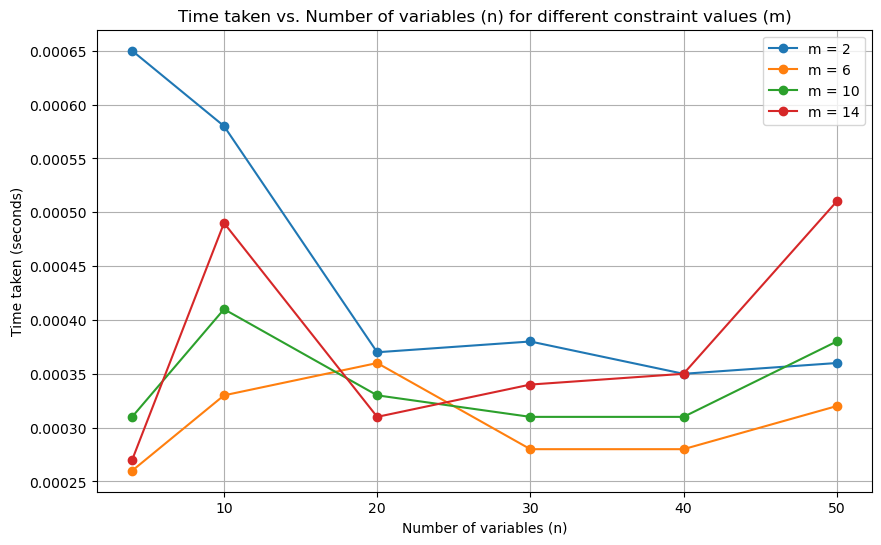

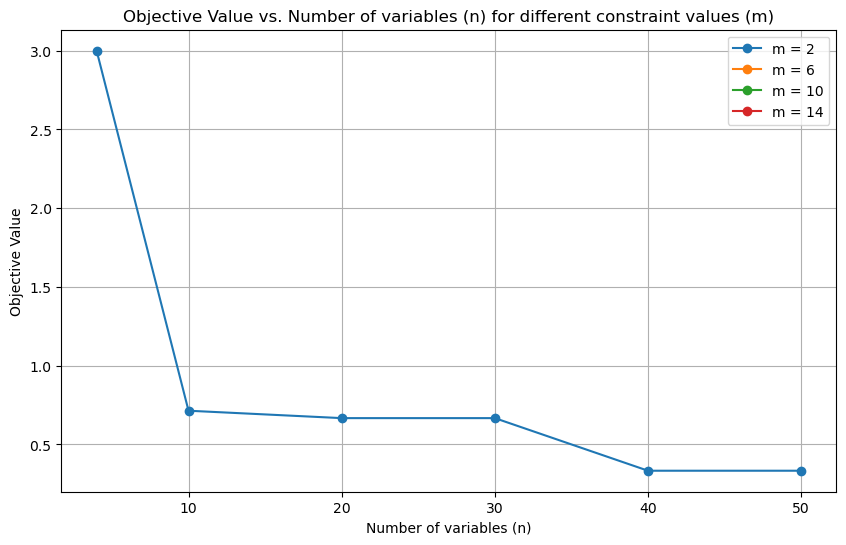

In [123]:
df_results = pd.DataFrame(results)


plt.figure(figsize=(10, 6))

for m_value in df_results['m'].unique():
    subset = df_results[df_results['m'] == m_value]
    plt.plot(subset['n'], subset['time'], label=f"m = {m_value}", marker='o')

plt.title('Time taken vs. Number of variables (n) for different constraint values (m)')
plt.xlabel('Number of variables (n)')
plt.ylabel('Time taken (seconds)')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))

for m_value in df_results['m'].unique():
    subset = df_results[df_results['m'] == m_value]
    plt.plot(subset['n'], subset['objective_value'], label=f"m = {m_value}", marker='o')

plt.title('Objective Value vs. Number of variables (n) for different constraint values (m)')
plt.xlabel('Number of variables (n)')
plt.ylabel('Objective Value')
plt.legend()
plt.grid(True)
plt.show()
